In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/ex1data2.txt',header=None)

In [3]:
dataset.columns = ['size(Square Feet)','no of bedrooms','price']

In [4]:
dataset.head()

,size(Square Feet),no of bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
dataset.describe()

,size(Square Feet),no of bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


# Plot data to view relationship

In [6]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,2].values
y = y[:,np.newaxis]

Text(0.5, 1.0, 'Hourse Price against Size of house')

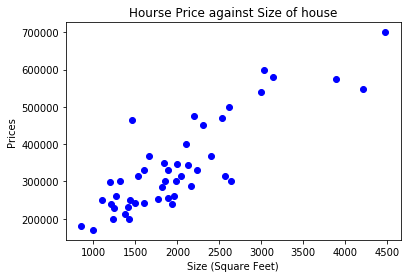

In [7]:
plt.scatter(X[:,0],y,color='blue')
plt.xlabel("Size (Square Feet)")
plt.ylabel("Prices")
plt.title("Hourse Price against Size of house")

Text(0.5, 1.0, 'Hourse Price against Number of bedroom')

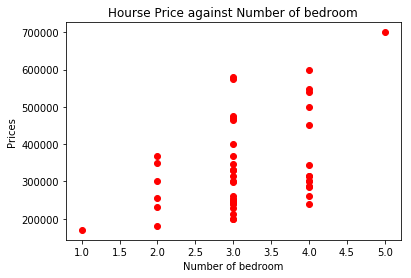

In [8]:
plt.scatter(X[:,1],y,color='red')
plt.xlabel("Number of bedroom")
plt.ylabel("Prices")
plt.title("Hourse Price against Number of bedroom")

In [9]:
#Feature Scaling (Standardization)

In [10]:
def normalization(X):
    mean = np.mean(X,axis=0)
    std  = np.std(X,axis=0)
    X_normalized = (X - mean)/std
    return X_normalized
    

In [11]:
X = normalization(X)

In [12]:
#add theta0 additional field

In [13]:
X = np.append(np.ones(shape=(len(X),1)),X,axis=1)

In [14]:
#initial theta matrix of using zeros
theta = np.zeros(shape=(3,1))

In [15]:
#cost function

In [16]:
#h(x)= theta0 + theta1*X1 +theta2*X2
def getCost(X,y,theta):
    m = len(y)
    predictions = np.dot(X,theta)
    squared_error = (predictions-y)**2
    cost = np.sum(squared_error)/(2*m)
    return cost

In [17]:
cost = getCost(X,y,theta)

In [18]:
cost

65591548106.45744

# Finding optimal values using Gradient Descent

In [19]:
history = []
def gradientDescent(X,y,theta):
    alpha = 0.01
    iterations = 400
    n = len(y)
    for i in range(iterations):
        prediction = np.dot(X,theta)
        error = prediction - y
        grad = np.dot(X.T,error)
        theta = theta - (alpha/n)*grad
        co = getCost(X,y,theta)
        history.append(co)
    return theta

In [20]:
thetas = gradientDescent(X,y,theta)

In [21]:
thetas

array([[334302.06399328],
       [ 99411.44947359],
       [  3267.01285407]])

# Plot Cost function over iteration

Text(0.5, 1.0, 'Cost function using Gradient Descent')

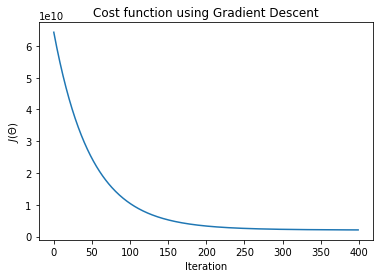

In [22]:
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Plotting the J(Θ) against the number of iterations gives a descending trend, proving that  gradientDescent function works for multivariate cases.